# SEABORN

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
%matplotlib inline

In [3]:
# load dataset dari seaborn tanpa read csv
df = sns.load_dataset('tips')
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

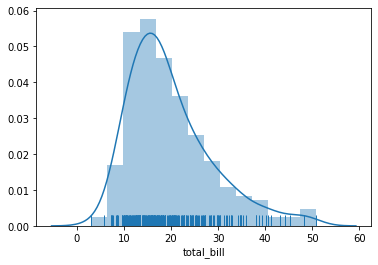

In [4]:
# menampilkan distribusi
sns.distplot(df['total_bill'], rug=True, hist=True, kde=True) 

## JOINT PLOT

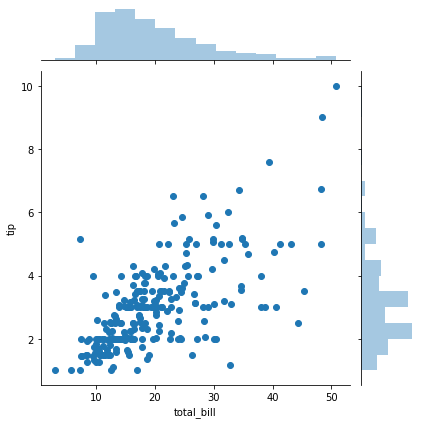

In [5]:
# menggabungkan 2 model distribusi
# dgn scatter plot
sns.jointplot(x='total_bill', y='tip', data=df, kind='scatter')

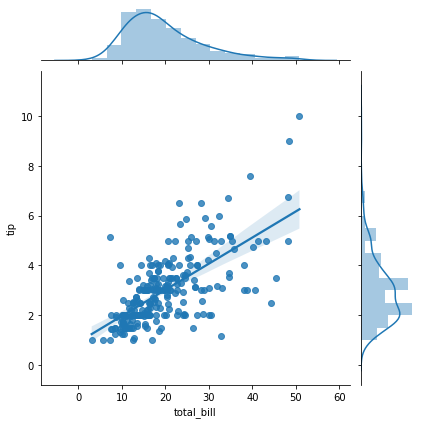

In [6]:
# dgn linear regression
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

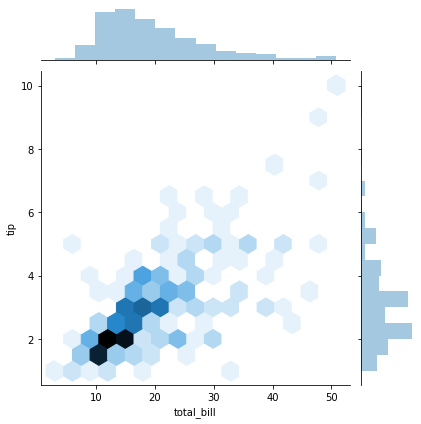

In [7]:
# dgn hexagonal
sns.jointplot(x='total_bill', y='tip', data=df, kind='hex')

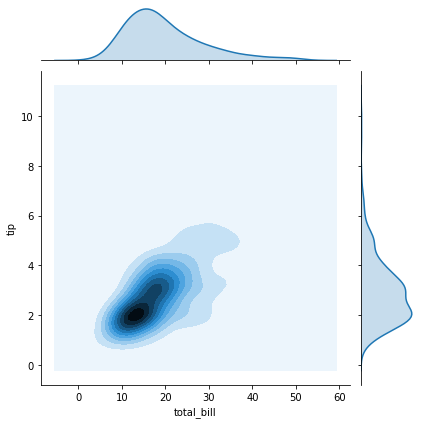

In [8]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='kde')

## PAIR PLOT

In [9]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

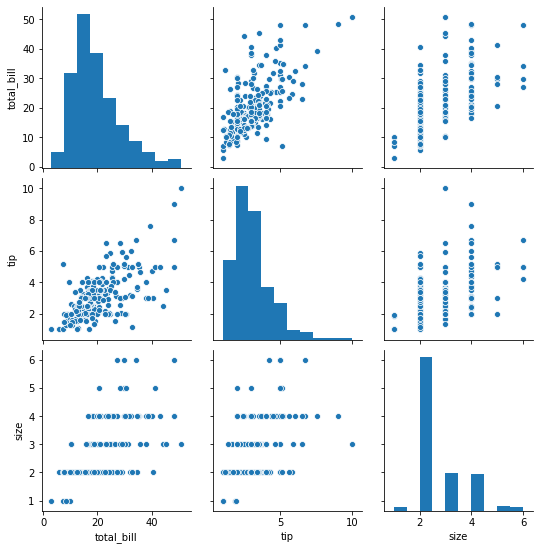

In [10]:
# memasangkan plot antar-column dalam dataframe
sns.pairplot(df)

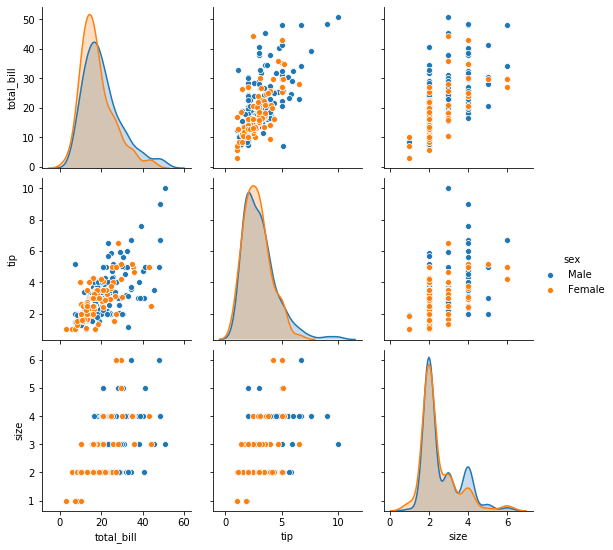

In [11]:
# memisahkan data dlm kolom yg categorical
sns.pairplot(df, hue='sex')

# COMPARISON

## countplot

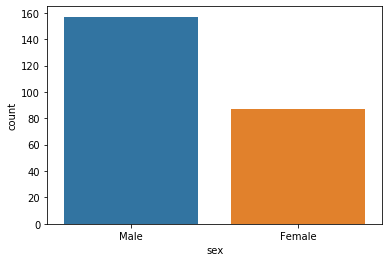

In [12]:
sns.countplot(x='sex', data=df)

In [13]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

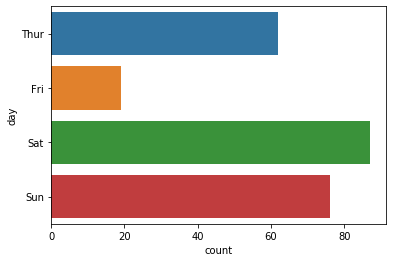

In [14]:
sns.countplot(y='day', data=df)

In [15]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

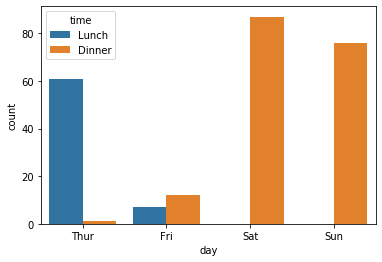

In [16]:
sns.countplot(x='day', hue='time', data=df)

In [17]:
df.groupby(['day','time']).count()['tip']

day   time  
Thur  Lunch     61.0
      Dinner     1.0
Fri   Lunch      7.0
      Dinner    12.0
Sat   Lunch      NaN
      Dinner    87.0
Sun   Lunch      NaN
      Dinner    76.0
Name: tip, dtype: float64

## barplot

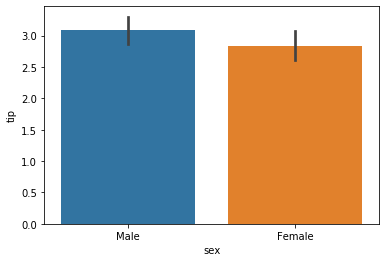

In [18]:
# rata-rata tip yg diberikan berdasarkan gender pembayar bill
sns.barplot(x='sex', y='tip', data=df)
# default estimatornya mean()

In [19]:
df.groupby('sex').mean()['tip']

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

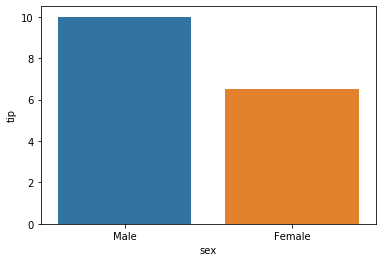

In [20]:
# parameter estimator untuk memilih fungsi  apa yg diinginkan 
# parameter ci untuk memunculkan garis hitam di tengah (error bar, mewakili stdev)

sns.barplot(x='sex', y='tip', data=df, estimator=np.max, ci=None)

In [21]:
df.groupby('sex').max()['tip']

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

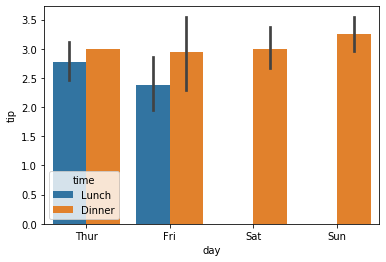

In [22]:
sns.barplot(x='day', y='tip', data=df, hue='time')

In [23]:
df.groupby(['day','time']).mean()['tip']

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Lunch          NaN
      Dinner    2.993103
Sun   Lunch          NaN
      Dinner    3.255132
Name: tip, dtype: float64

## boxplot

In [24]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

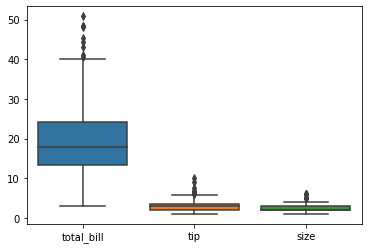

In [25]:
sns.boxplot(data=df)

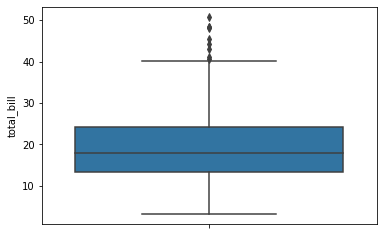

In [26]:
sns.boxplot(y='total_bill',data=df)

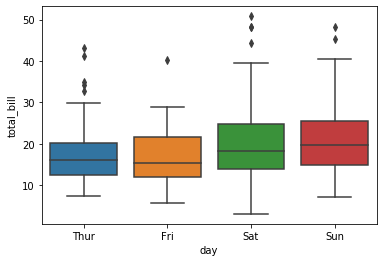

In [27]:
sns.boxplot(x='day', y='total_bill', data=df)

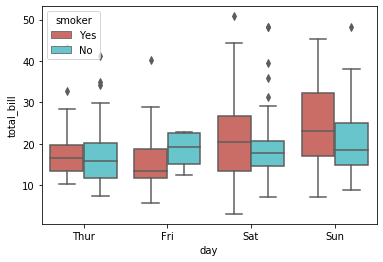

In [28]:
sns.boxplot(x='day', y='total_bill', data=df, hue='smoker', palette='hls')
# pilih palette warna di sini https://seaborn.pydata.org/tutorial/color_palettes.html


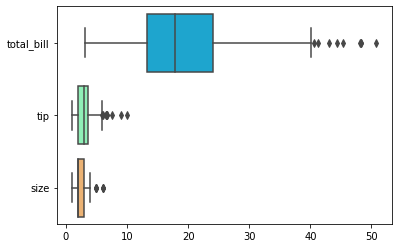

In [29]:
# orient untuk pilih horizontal atau vertical
sns.boxplot(data=df, palette='rainbow', orient='h')

## catplot

categorical plot

secara default kind='strip', kind tinggal pilih mau plot jenis apa


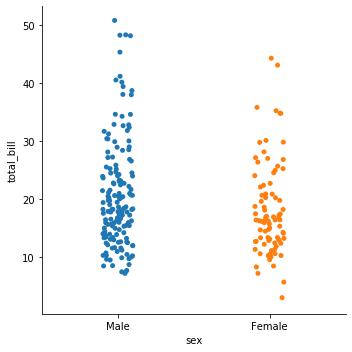

In [30]:
sns.catplot(x='sex',y='total_bill', data=df) 

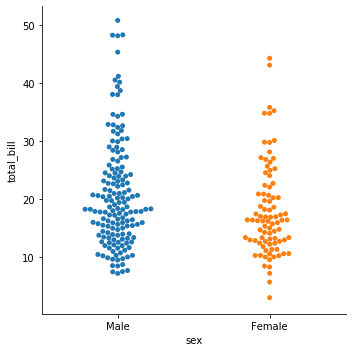

In [31]:
sns.catplot(x='sex',y='total_bill', data=df, kind='swarm')

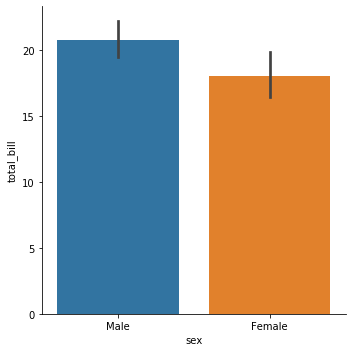

In [32]:
sns.catplot(x='sex',y='total_bill', data=df, kind='bar')

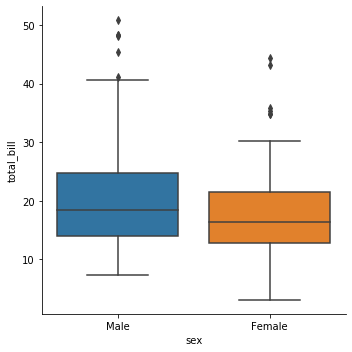

In [33]:
sns.catplot(x='sex',y='total_bill', data=df, kind='box')

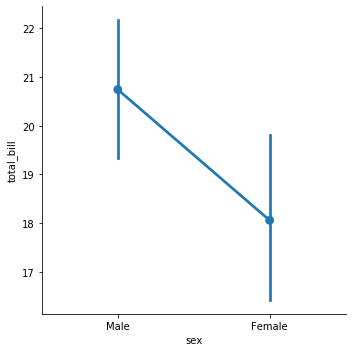

In [34]:
sns.catplot(x='sex',y='total_bill', data=df, kind='point')

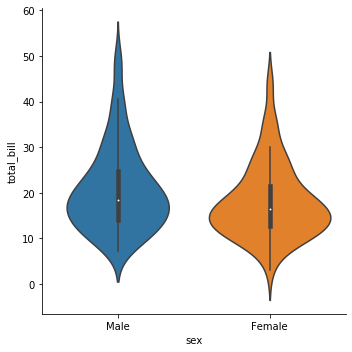

In [35]:
sns.catplot(x='sex',y='total_bill', data=df, kind='violin')

# MATRIX

In [36]:
df.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

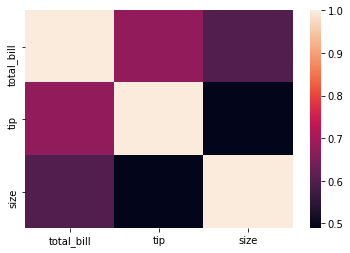

In [37]:
sns.heatmap(df.corr())

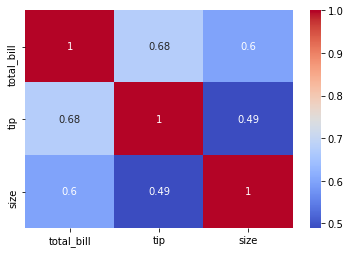

In [38]:
# cmap untuk pilih paletee warna
# annot untuk keterangan angka di dalam kotak
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [39]:
# membuat matrix berisi angka 0, dgn ukuran yg sama seperti marix/df correlation 
mask = np.zeros_like(df.corr())
mask

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [40]:
# mengambil index diagonal ke atas 
mask[np.triu_indices_from(mask)]=True
mask

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [41]:
np.triu_indices_from(mask) # index/posisi yg berubah jadi True (1.0)

(array([0, 0, 0, 1, 1, 2], dtype=int64),
 array([0, 1, 2, 1, 2, 2], dtype=int64))

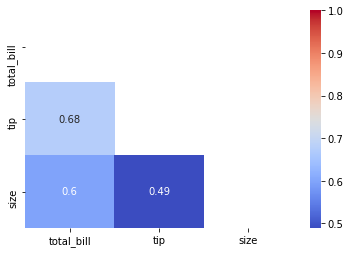

In [42]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, mask=mask, vmax=1)
# vmax untuk nilai maximum pada legend 

# ClUSTERMAP

In [43]:
df_flight = sns.load_dataset('flights')
df_flight.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [44]:
# pivot

pv_flight = df_flight.pivot_table(values='passengers', index='month', columns='year')
pv_flight

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

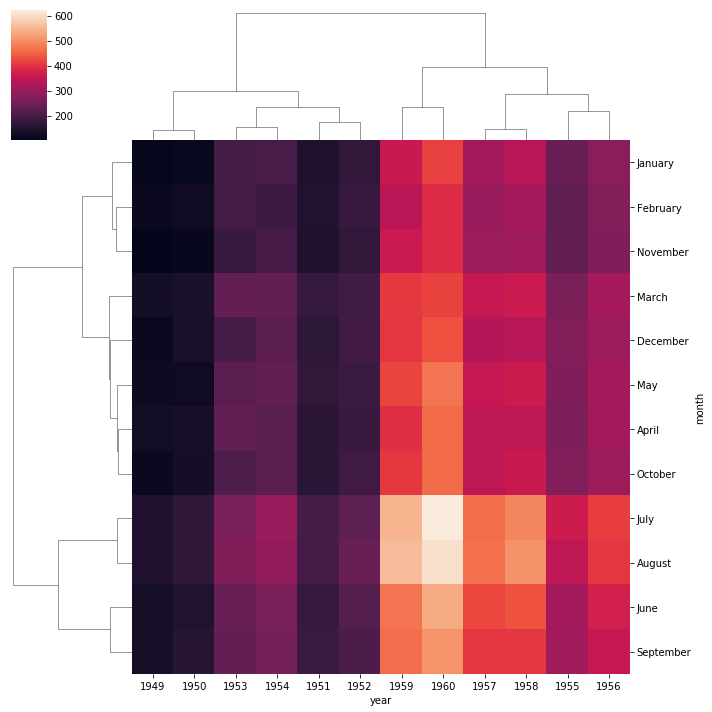

In [45]:
sns.clustermap(pv_flight)
# matrix dgn cluster grup yg memiliki data yg mirip

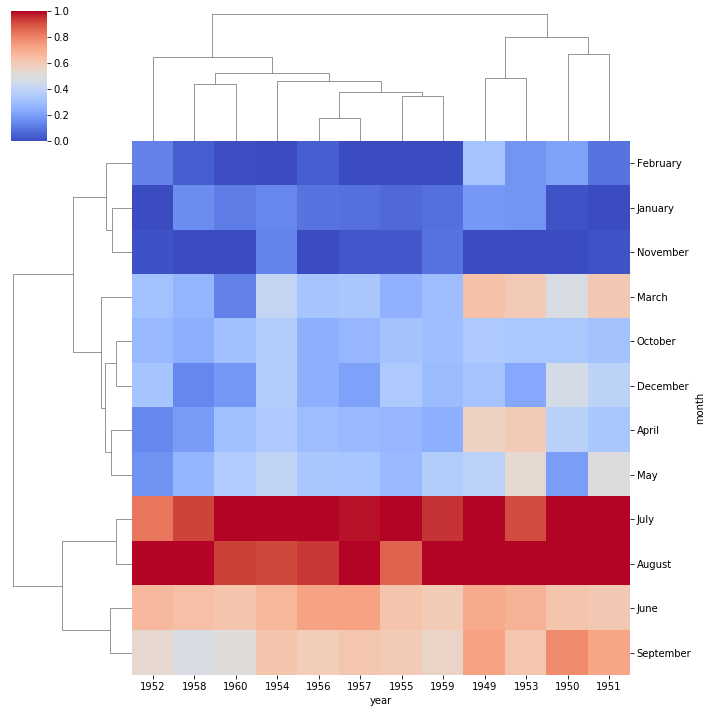

In [46]:
# skalanya diubah dgn standard_scale
sns.clustermap(pv_flight, cmap='coolwarm', standard_scale=1)

# Grids

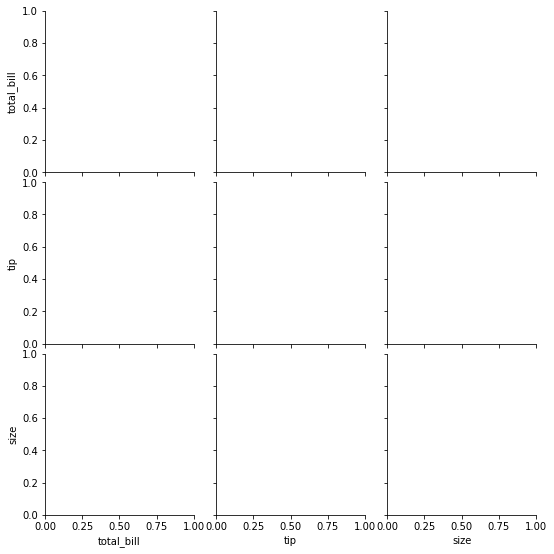

In [47]:
sns.PairGrid(df)

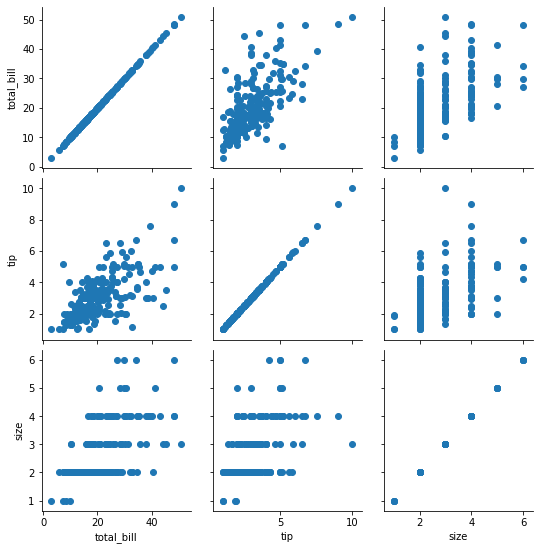

In [48]:
sns.PairGrid(df).map(plt.scatter)

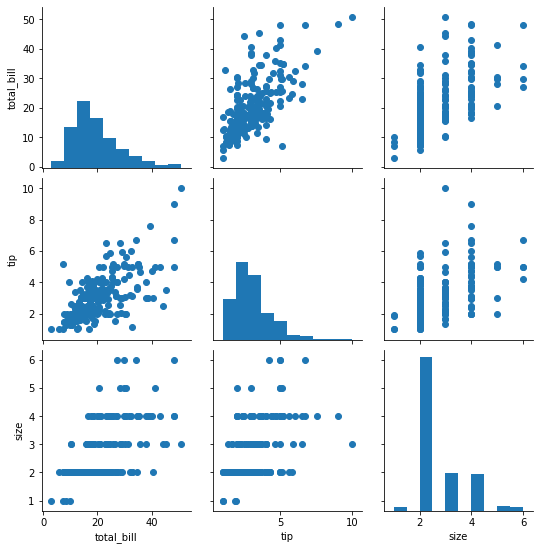

In [49]:
g = sns.PairGrid(df)

g.map_diag(plt.hist) # mengisi grid diagonal dgn histogram
g.map_upper(plt.scatter) # mengisi grid di atsa diagonal dgn scatterplot
g.map_lower(plt.scatter)
# g.map_offdiag()

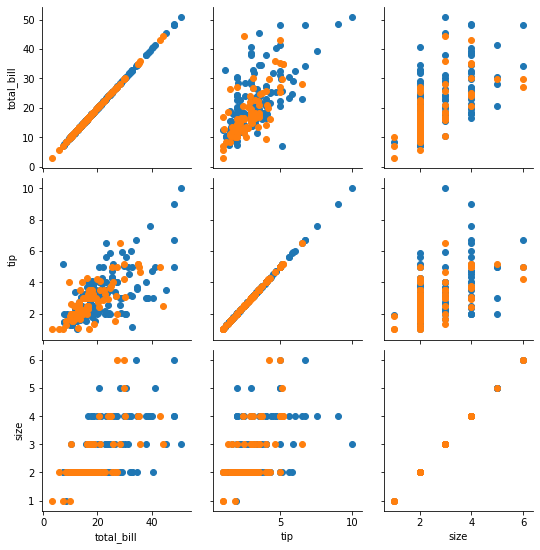

In [50]:
g = sns.PairGrid(df, hue='sex')
g.map(plt.scatter)

## Facet Grid

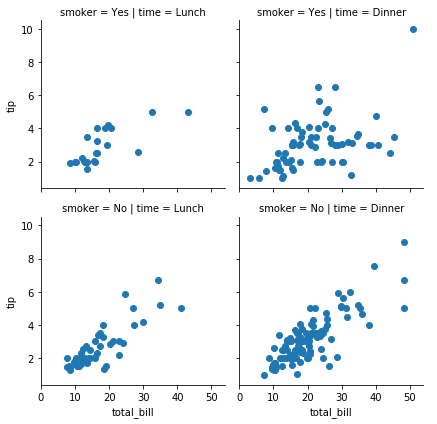

In [51]:
g = sns.FacetGrid(df, col='time', row='smoker')
g.map(plt.scatter,'total_bill','tip').add_legend()

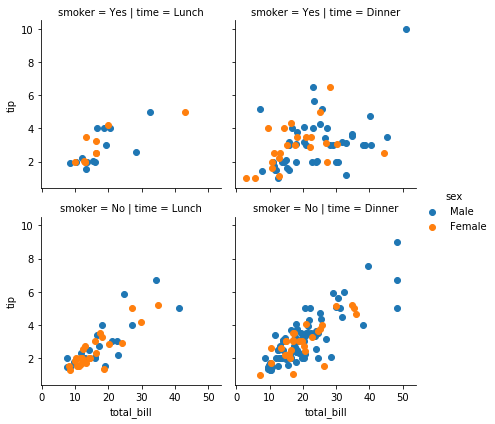

In [52]:
g = sns.FacetGrid(df, col='time', row='smoker', hue='sex')
g.map(plt.scatter,'total_bill','tip').add_legend()

## Join Grid

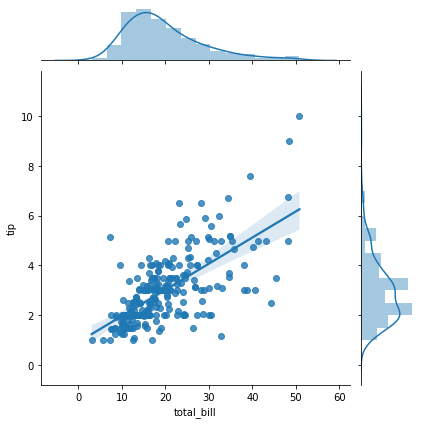

In [53]:
g = sns.JointGrid(x='total_bill', y='tip', data=df)
g.plot(sns.regplot, sns.distplot)

# REGRESSION 

melihat relationship antar-2 kolom

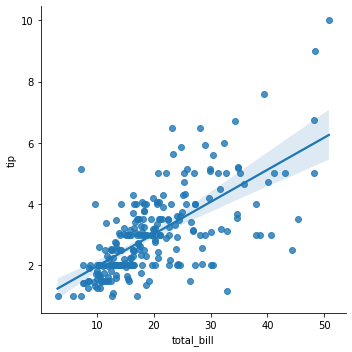

In [54]:
# Linear Model

sns.lmplot(x='total_bill', y='tip', data=df)

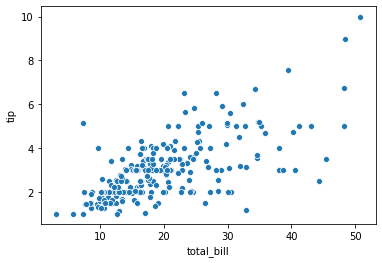

In [55]:
sns.scatterplot(x='total_bill', y='tip', data=df)

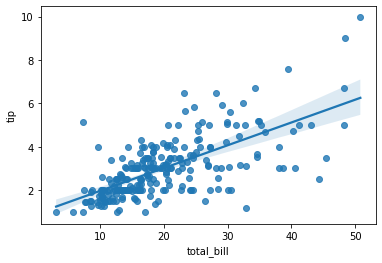

In [56]:
sns.regplot(x='total_bill', y='tip', data=df)

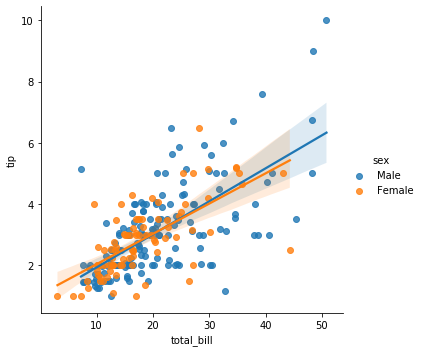

In [57]:
sns.lmplot(x='total_bill', y='tip', data=df, hue='sex')

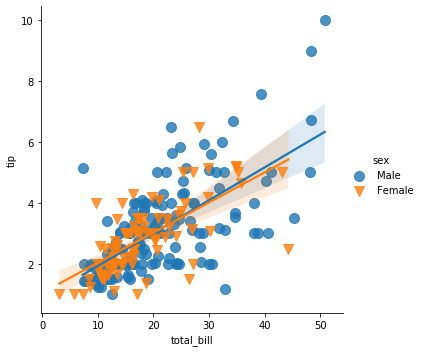

In [58]:
sns.lmplot(x='total_bill', y='tip', data=df, hue='sex', 
            markers=['o','v'], scatter_kws={'s':100})

# markers : bentuk plot
# scatter_kws : ubah scatterplot, bisa size, dll

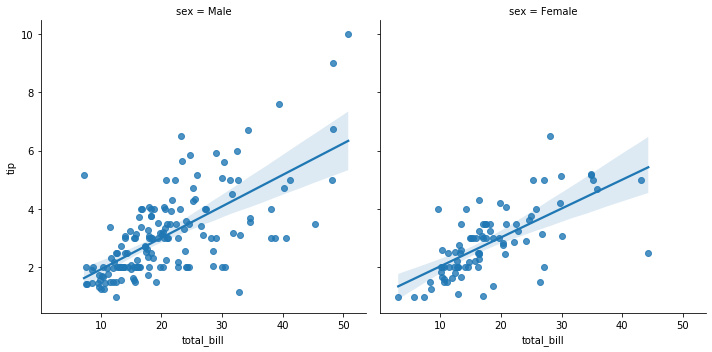

In [59]:
sns.lmplot(x='total_bill', y='tip', data=df, col='sex')

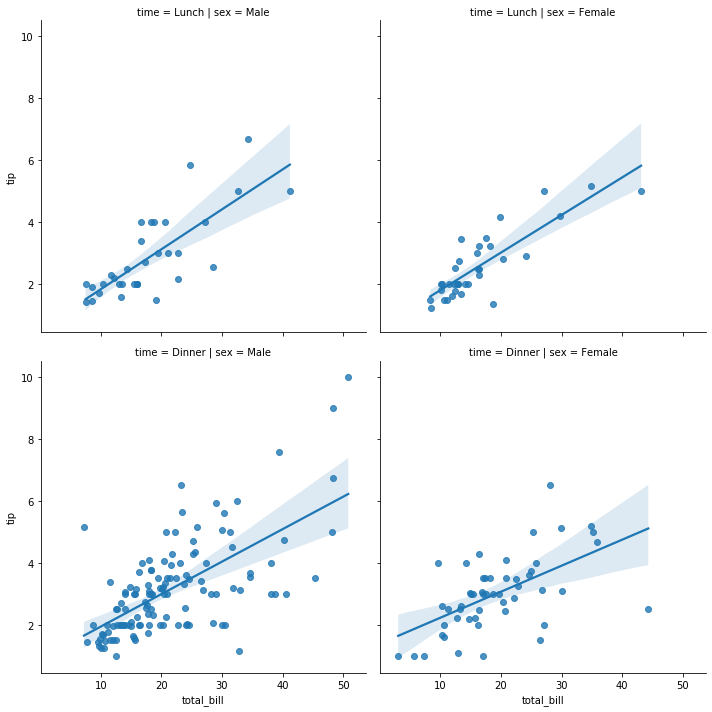

In [60]:
sns.lmplot(x='total_bill', y='tip', data=df, col='sex', row='time')

# col dan row untuk memisahkan data categorical

# TUGAS

Tampilkan presentasi dari salah satu dataset di bawah

In [61]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [62]:
x = sns.load_dataset('mpg')
x.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino